# Statistical Tests and Confidence Intervals
We've seen above how estimators can be informative about their population counterparts. Now we will review how we can formally test hypotheses about population parameters using this information. To conduct a test, we will need to construct a test statistic. A test statistic will be a function of the data (and thus, it is...you guessed it, a random variable). Our goal when constructing a test statistic is that we

1. Know its (asymptotic) distribution under the null hypothesis
2. The test statistic increases the more evidence there is against the null hypothesis

Let's consider the example of the sample mean once again. Let the data $X_1,...,X_N$ be iid. What if we want to test the null hypothesis that the population mean is some constant $c$, i.e, $H_0:\mu = c$? We need to know the distribution of our test statistic under the null hypothesis. So suppose the null is true. But how do we know anything about the distribution of anything!? We didn't assume $X_i$ follows any particular distribution. So we are in deep water, right? No. Let us perform another Monte Carlo exercise with sample mean. This time, we will consider the distribution of $\sqrt{N}(\bar{X}_N - \mu)$ when $X_i\sim Bernoulli(0.5)$.

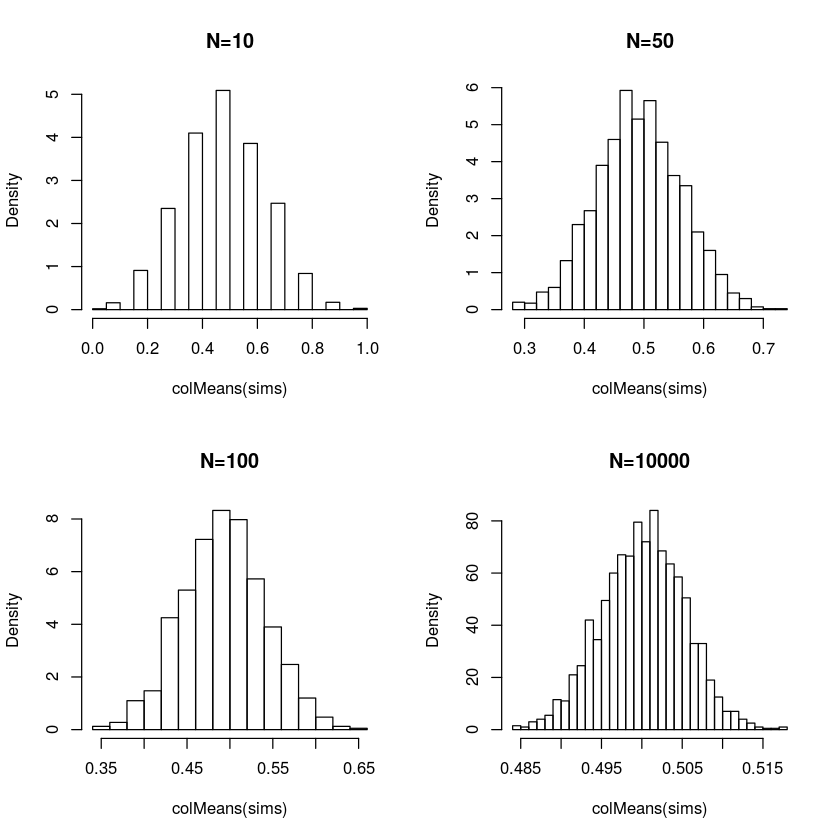

In [31]:
set.seed(210)
nsim = 2000
sizes = c(10, 50, 100, 10000)
p = 0.5

par(mfrow=c(2, 2))
for (N in sizes) {
    sims = sapply(1:nsim, function(x)rbinom(n=N,size=1,prob=p), simplify="array")
    
    hist(colMeans(sims), freq=FALSE, main=paste("N=", N, sep=""),
        breaks=round(13 + 2*log(N)))
}

We see above that the sample mean of $N$ draws from a $Bernoulli(0.5)$ random variable appear to have a distribution that converges to a normal distribution with variance $0.5(1-0.5)=0.25$. This is amazing! The Bernoulli distribution is nothing like a normal and yet the sampling distribution of its mean appears to converge to a normal distribution!

As we explore the theory of this result, lets first recall what we mean when the distribution of a sequence of random variables, e.g., of $\{\bar{X}_N\}_N$, converges to the distribution of some random variable $X$. 

## Definition: Convergence in Distribution
We say that a sequence of random vectors $\{X_N\}_N$ converges in distribution to a random vector $X$, denoted $X_n\overset{d}{\to}X$, if

$$
P(X_N\leq x) \to P(X\leq x)
$$

for all $x$ at which $P(X\leq x)$ is continuous. Recall that $P(X\leq x)=F(x)$, the cdf of $X$. Now we can explore the remarkable result which our Monte Carlo exercise has hinted at.

### Intuition and More
- The shape of the distribution of $X_N$ is converging to the shape of the distribution of $X$.
- An odd example: Let $X_N=-X$ where $X\sim\mathcal{N}(0,1)$. $X_N$ actually converges in distribution to $X$. Can you see why?
- An analagous concept exists for random vectors. BUT...$X_N\overset{d}{\to}X$ and $Y_N\overset{d}{\to}Y$ DOES NOT IMPLY $(X_N,Y_N)'\overset{d}{\to}(X,Y)$. That is, marginal convergence in distribution DOES NOT IMPLY joint convergence in distribution. Can you understand why? Because we must also consider dependence between $X$ and $Y$ when considering the joint distribution, information not contained in the marginal distributions.
- Also, note that $X_N\overset{p}{\to}X$ implies $X_N\overset{d}{\to}X$. That is, convergence in probability implies convergence in distribution.

## Theorem: Central Limit Theorem (CLT)
Suppose $\{X_i\}_i$ is an iid sequence of random variables with distribution $P$. If $\sigma^2<\infty$ then

$$
\sqrt{N}(\bar{X}_N - \mu)\overset{d}{\to}\mathcal{N}(0,\sigma^2).
$$

The proof is not relevant for you to know for this class. But you will be required to know how to use the result. One such application is in the construction of test statistics, the reason we started this whole exercise (remember, we want to test economic models using data).

### Theorem: CLT (Multivariate Case)
Suppose $\{X_i\}_i$ is an iid sequence of random **vectors** of length $K$ with *multivariate* distribution $P$. If $\Sigma=Var[X_i]<\infty$ then

$$
\sqrt{N}(\bar{X}_N - \mu)\overset{d}{\to}\mathcal{N}(0,\Sigma).
$$

where $\Sigma$ is a $K\times K$ variance matrix and $\mu$ is a $K\times 1$ vector of means.

## Statistical Testing Using CLT
So let's continue with our test statistic for the sample mean. 

### Finding the relevant asymptotic distribution
Under the null hypothesis $H_0:\mu = c$, we now know that, by the CLT, 

$$
\sqrt{N}(\bar{X}_N - c) \overset{d}{\to}\mathcal{N}(0,\sigma^2)
$$
$$
\implies \sqrt{N}\frac{\bar{X}_N - c}{\sigma}\overset{d}{\to}\mathcal{N}(0,1),
$$

so that a good test statistic would be $\tau_N\equiv \sqrt{N}(\bar{X}_N-c)/\hat{\sigma}_N$. 

- Note: There is a Theorem, called the Slutzky theorem, which says that if $X_N \overset{d}{\to}X$ and $Y_N\overset{p}{\to}c$, where $c$ is a constant, then $Y_NX_N\overset{d}{\to}cX$. This will prove useful later in class, but is also useful in our example. We can use it to prove that $\tau_N\overset{d}{\to}\mathcal{N}(0,1)$, where notice that $\tau_N$ differs from the expression above because we use the sample estimator in place of $\sigma$.

### Writing the test
We will write the test so that we reject the null if it evaluates to 1 and 0 if we fail to reject. We can write the test for the sample mean as $\phi_N = \boldsymbol{1}(|\tau_N|\geq z_{1-\alpha/2})$, where $z_{1-\alpha/2}$ denotes the $1-\alpha/2$ percentile of normal distribution. Again, remember that since $\tau_N$ is a function of the data and $\phi_N$ is a function of $\tau_N$ that both are functions of random variables and therefore they too are random variables!

Our test is such that we reject the null hypothesis if $\phi_N=1$ and fail to reject if $\phi_N=0$. Thus, the larger the magnitude of $\bar{X}_N$ and the smaller the value of $\hat{\sigma}_N$, the more likely we are to reject the null hypothesis. But notice that there is always some probability that we fail to reject, even if the null hypothesis is false. Thus, we can specify a value of $\alpha$, usually $0.05$ or $0.01$, or we can report the "smallest value of $\alpha$ for which our test rejects the null hypotheis."

### The p-value
The p-value is the "smallest value of $\alpha$ for which our test rejects the null hypothesis." Formally, 

$$
\hat{p}_N \equiv \inf\left\{\alpha\in(0,1):\;\phi_n=1\right\}.
$$

Notice, again, that $\hat{p}_N$ is a function of random variables and is itself a random variable! As an example, let's compute the p-value in the case where $\tau_N = 2$. Then the p-value $\hat{p}_N$ solves

$$
2 = z_{1-\hat{p}_N/2}
$$

which implies

$$
\Phi(2) = \Phi(z_{1-\hat{p}_N/2}) = 1-\hat{p}_N/2 \implies \hat{p}_N = 2(1-\Phi(2)).
$$
We can calculate this probability in R.

In [32]:
2*(1 - pnorm(2))

[1] 0.04550026

### Theory of Test Construction
Why formulate the test as we did? So that $E[\phi_N]=P(\text{reject given null is true})\to \alpha$. Formally,

$$
E[\phi_n] = E[\boldsymbol{1}(|\tau_N|\geq z_{1-\alpha/2})]
$$
$$
= P(|\tau_N|\geq z_{1-\alpha/2})
$$
$$
= P(\tau_N\geq z_{1-\alpha/2}) + P(-\tau_N \geq z_{1-\alpha/2}) = 1 - P(\tau_N< z_{1-\alpha/2}) + P(\tau_N \leq  -z_{1-\alpha/2})
$$
$$
\to 1 - \Phi(z_{1-\alpha/2}) + \Phi(-z_{1-\alpha/2}) = 1 - [1 - \alpha/2] + \alpha/2 = \alpha.
$$

We say that the test is then consistent in level for critical value $\alpha$, which just says that the probability of rejecting the null given the null is true converges to $\alpha$.

### Confidence Intervals
What about constructing confidence intervals? Again, consider the example of the same mean above. Let $C_N$ be the confidence interval. We want to design this confidence interval such that $P(\mu\in C_N)\to 1$. Let's consider 
\begin{align*}
C_N & = \{c\;|\; |\tau_N|\leq z_{1-\alpha/2}\} \\
& = \{c\;|\; -z_{1-\alpha/2} \leq \tau_N \leq z_{1-\alpha/2}\} \\
& = \{c\;|\;  -z_{1-\alpha/2} \leq \sqrt{N}(\bar{X}_N - c)/\hat{\sigma}_N \leq z_{1-\alpha/2} \} \\
& = \left\{c\;\bigg|\;  -\frac{z_{1-\alpha/2}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N \leq c \leq \frac{z_{1-\alpha/2}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N \right\} \\
& = \left[-\frac{z_{1-\alpha/2}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N,\; \frac{z_{1-\alpha/2}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N\right]
\end{align*}
where we can see from line 2 that $P(-z_{1-\alpha/2} \leq \tau_N \leq z_{1-\alpha/2})\to 1-\alpha/2-\alpha/2=1-\alpha$.

# Substituting Man with Machine: The Bootstrap Method
That exercise seemed pretty tedious. It was a lot of math. Isn't there an easier way to compute confidence intervals and to conduct statistical tests? Answer: Yes! We can also use a procedure called the bootstrap, which is really useful in situations where the asymptotics of a particular estimator are hard to work out analytically.

The idea is simple. Let's suppose we have an iid sample $\{X_i\}_{i=1}^N$ where each $X_i$ is distributed according to some unknown distribution $F$. Now let us make $K$ new bootstrap samples by drawing (with replacement) from our original sample. Thus, if our sample is $\{1, 2, 3\}$, some boostrap samples might be $\{3, 1, 1\}$, $\{1, 2, 2\}$, and $\{3, 2, 1\}$. For the original sample we can obtain our estimator of, for example, the sample mean $\bar{X}_N$. For each bootstrap sample, we compute a sample mean as well, denoted $\bar{X}^k_N$.

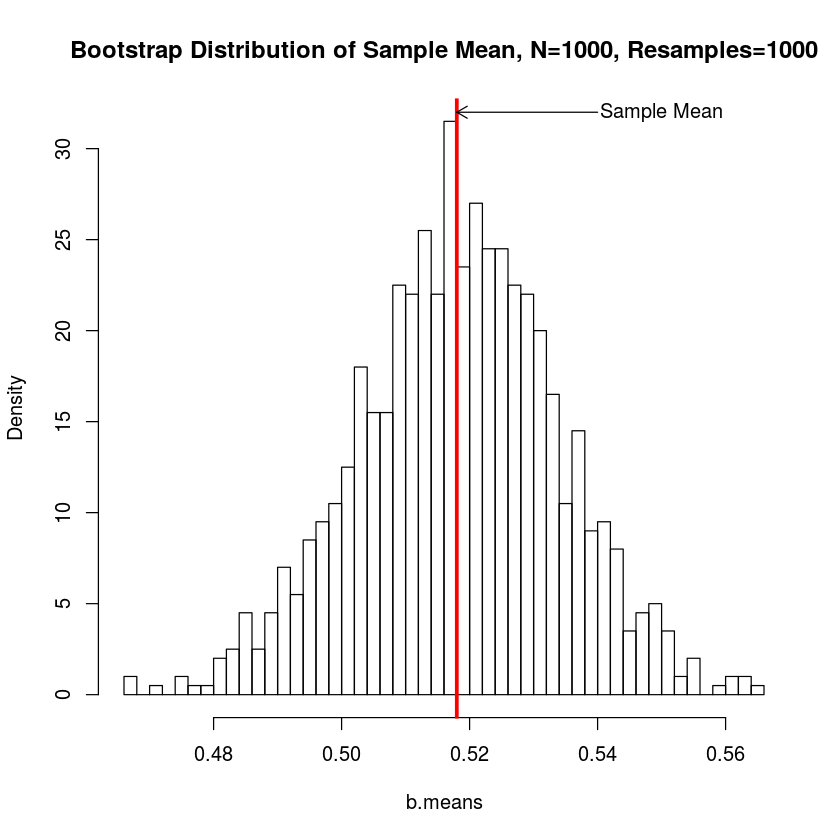

In [62]:
set.seed(210)
N = 1000
bdraws = 1000

# Simulate sample
data = rbinom(n=N, size=1, prob=0.5)
mean = mean(data)

# Bootstrapping sample mean, returns N x bdraws array
b.means = sapply(1:bdraws, function(k)mean(sample(data, size=N, replace=T)))
hist(b.means, freq=FALSE, breaks=40,
     main=paste("Bootstrap Distribution of Sample Mean, N=1000, Resamples=", 
                bdraws, sep=""))
abline(v=mean, lwd=3, col="red")
text(0.55, 32, "Sample Mean")
arrows(x0=0.54, y0=32, x1=mean, y1=32, lwd=1, length=0.1)

## Confidence Intervals with the Bootstrap
Now that we have our distribution of means calculated by the bootstrap, how do we conduct a confidence interval and perform a statistical test? 

First, let us build a confidence interval, as it is simple. For a 95% confidence interval, just pick the 2.5 and 97.5 percentiles of the bootstrap distribution of the sample mean.

In [66]:
ci = quantile(b.means, probs=c(0.025, 0.975))
ci

2.5%    97.5% 
0.486975 0.549000

Or graphically...

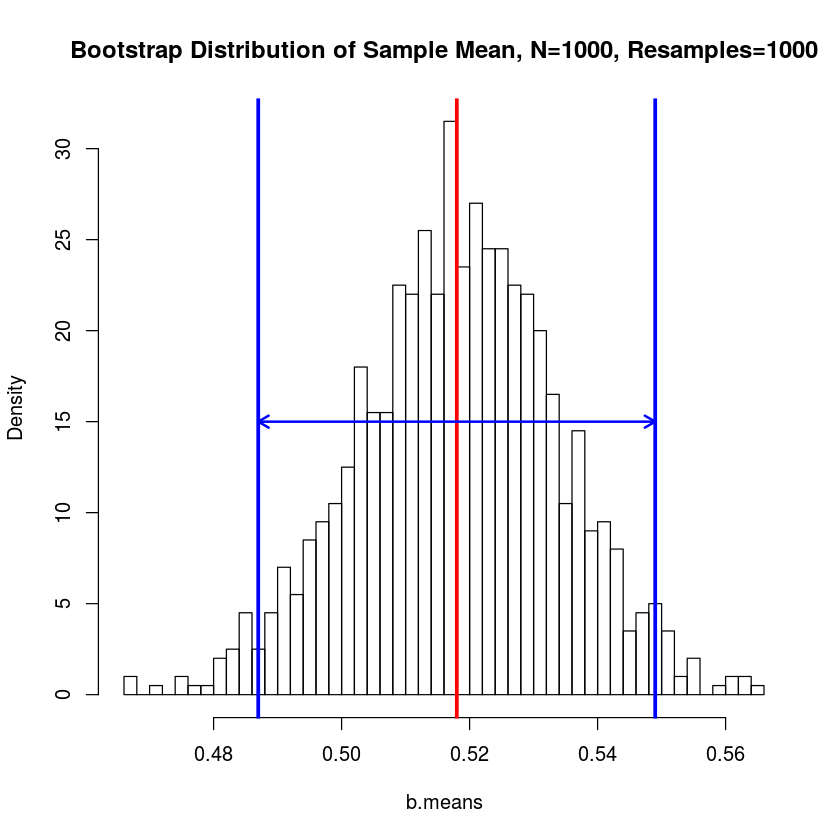

In [70]:
hist(b.means, freq=FALSE, breaks=40,
     main=paste("Bootstrap Distribution of Sample Mean, N=1000, Resamples=", 
                bdraws, sep=""))
abline(v=mean, lwd=3, col="red")

arrows(x0=mean, x1=ci[1], y1=15, y0=15, lwd=2, length=0.1, col="blue")
arrows(x0=mean, x1=ci[2], y1=15, y0=15, lwd=2, length=0.1, col="blue")
abline(v=ci[1], lwd=3, col="blue")
abline(v=ci[2], lwd=3, col="blue")

Computing the 95% confidence interval analytically, recall the formula above:

$$
\left[-\frac{z_{0.975}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N,\; \frac{z_{1-\alpha/2}\hat{\sigma}_N}{\sqrt{N}} + \bar{X}_N\right]
$$

where $z_{0.975}$ is the 97.5 percentile of the standard normal distribution, $\bar{X}_N$ is the sample mean and $\hat{\sigma}_N$ is the sample standard deviation. We compute a confidence interval very similar to our bootstrap confidence interval.

In [72]:
z975 = qnorm(0.975)
c(-z975*sd(data)/sqrt(N) + mean, z975*sd(data)/sqrt(N) + mean)

[1] 0.4870148 0.5489852

## Statistical Tests with the Bootstrap
Performing tests is a bit more difficult. Suppose our hypothesis is $H_0:\mu \leq 0.49$. What we will do is recenter our  bootstrap distribution over $0.49$ and then compute the fraction of bootstrap means of the recentered distribution greater than $0.49$, from which we obtain our p-value.

The basic idea is that we build an empirical counterpart to the true null distribution using the bootstrap distribution centered over the null. Then, intuitively, we find the "minimum value $\alpha$ for which our test rejects the null", i.e., the fraction of estimates of the mean in our empirical null distribution that are more extreme than the sample mean computed for our data.

In [73]:
null.mean = b.means - mean(b.means) + 0.49
sum(null.mean > mean)/bdraws

[1] 0.038

What are we doing graphically? Getting the "area of the histogram" of the null distribution to the right of the sample mean.

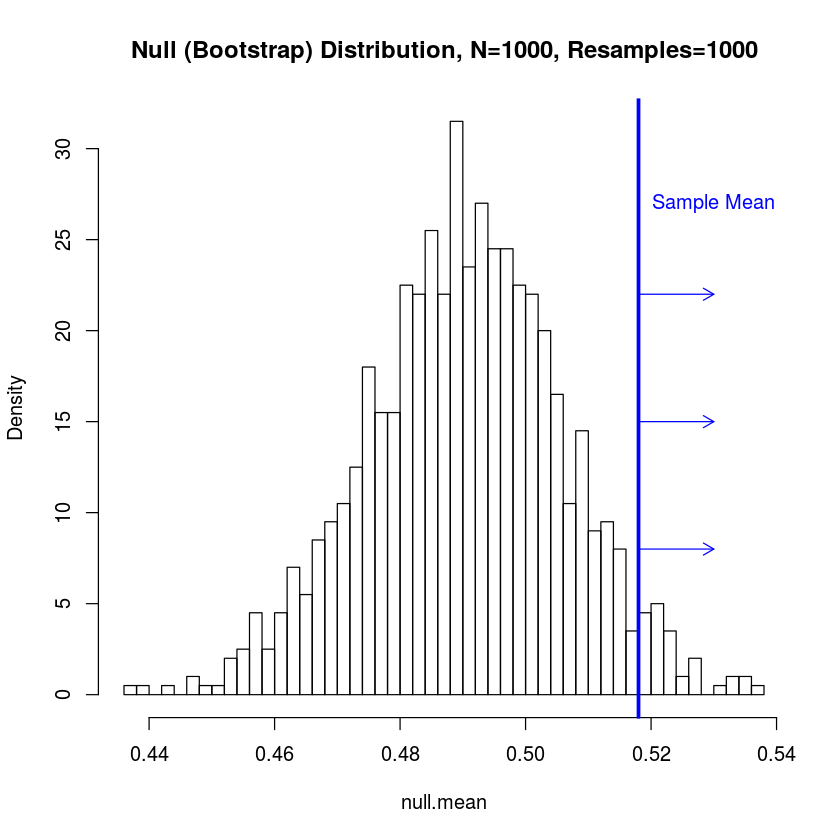

In [80]:
hist(null.mean, freq=FALSE, breaks=40,
     main=paste("Null (Bootstrap) Distribution, N=1000, Resamples=", 
                bdraws, sep=""))
abline(v=mean, lwd=3, col="blue")
arrows(x0=mean, x1=0.53, y1=22, y0=22, length=0.1, col="blue")
arrows(x0=mean, x1=0.53, y1=15, y0=15, length=0.1, col="blue")
arrows(x0=mean, x1=0.53, y1=8, y0=8, length=0.1, col="blue")
text(0.53, 27, "Sample Mean", col="blue")

We will compare this estimate of the p-value with what we get analytically, using the formula from above. If $\tau_N$ is our test statistic, for a one-sided test the p-value is calculated as $1 - \Phi(\tau_N)$.

In [83]:
t.stat = sqrt(N)*(mean - 0.49)/sd(data)
1 - pnorm(t.stat)

[1] 0.03826889

We see that our estimate using the analytically derived formula for the p-value is really close to our bootstrap p-value! What if our test was two-sided, e.g., $H_0:\mu = 0.49$? To compute the p-value using bootstrap we now consider how many values of the (null) bootstrap distribution are further than $|\bar{X}_N - 0.49|$ from $0.49$. 

In [84]:
sum(abs(null.mean - 0.49) > abs(mean - 0.49))/bdraws

[1] 0.077

Or graphically the "area of the histogram" of the null distribution outside the mean and the mean reflected about the null.

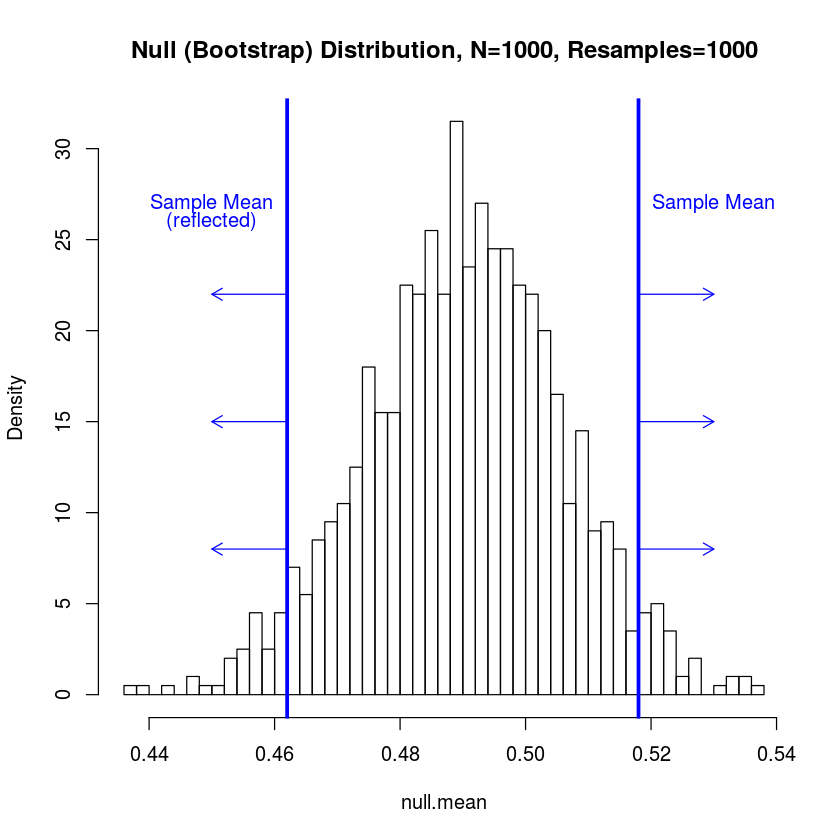

In [89]:
hist(null.mean, freq=FALSE, breaks=40,
     main=paste("Null (Bootstrap) Distribution, N=1000, Resamples=", 
                bdraws, sep=""))
abline(v=mean, lwd=3, col="blue")
arrows(x0=mean, x1=0.53, y1=22, y0=22, length=0.1, col="blue")
arrows(x0=mean, x1=0.53, y1=15, y0=15, length=0.1, col="blue")
arrows(x0=mean, x1=0.53, y1=8, y0=8, length=0.1, col="blue")
text(0.53, 27, "Sample Mean", col="blue")

mean.reflected = 0.49 - abs(mean - 0.49)
abline(v=mean.reflected, lwd=3, col="blue")
arrows(x0=mean.reflected, x1=0.45, y1=22, y0=22, length=0.1, col="blue")
arrows(x0=mean.reflected, x1=0.45, y1=15, y0=15, length=0.1, col="blue")
arrows(x0=mean.reflected, x1=0.45, y1=8, y0=8, length=0.1, col="blue")
text(0.45, 27, "Sample Mean", col="blue")
text(0.45, 26, "(reflected)", col="blue")

And we can also compute the two-sided p-value analytically using the formula $2(1-\Phi(\tau_N))$.

In [90]:
2*(1-pnorm(t.stat))

[1] 0.07653777

Which, again, is really close to our analytical p-values constructed using the test statistic.

## Advice for Using Bootstrap
The bootstrap may seem like magic, and in some ways it is. This course won't be concerned about the theory of the bootstrap, but we do want to provide some guidelines. 
1. It is still bound by basic asymptotic properties similar to its analytical counterpart. That is, bootstrap confidence intervals will generally shrink as the sample size grows.
2. The way you create bootstrap samples should reflect the dependence structure of the data. In our example, we believed each observation to be independent, so we sampled everyone with equal probability and with replacement. If, however, we had a sample composed of individuals in families, or students in classrooms, we would sample whole families or whole classrooms of students to reflect the dependence between observations in these groups.
3. There are other ways to perform the bootstrap besides purely resampling the data, e.g., "parametric" bootstrap. But we feel the method shown in class is the most commonly used today in econometrics.